# Redes Neuronales

Si tenemos datos como se ve en la  gráfica  <img src="imagenes/clasificacion_no_lineal.png" width="600"> encontrar la combinación de  parámetros correctos ya se vuelve una tarea descomunal, pues tendriamos que explorar muchas combinaciones posibles, un ejemplo de como podría quedar sería lo siguiente:

$b+\omega_1 \cdotp x_1 + \omega_2 \cdotp x_2 +\omega_3 \cdotp x_1 \cdotp x_2 + \omega_4 \cdotp x_1^2 \cdotp x_2 + \omega_5 \cdotp x_1^3 \cdotp x_2 + \omega_6 \cdotp x_1 \cdotp x_2^2 + \cdots$


Es entonces, que ahora recurrimos a las redes neuronales, que desde sus origenes fueron algoritmos que intentaron imitar el cerebro.

Fue muy utilizado en los años 80 y principios de los 90; su popularidad disminuyó a finales de los 90; y tuvieron un resurgimiento reciente, como una técnica de vanguardia para muchas aplicaciones de inteligencia artificial, gracias en parte a los avances que se realizaron en poder de cómputo de las PC.

La clave es que en lugar de crear una sola ecuación que modele todo el comportamiento de los datos, ahora usaremos muchos clasificadores lineales y la solución final es la suma de todos ellos. 



# Neurona

La neurona es la unidad del todo en el cerebro, es decir, el cerebro esta formado por millones de neuronas  y sus interconexiones entre ellas.

<img src="imagenes/neuronapartes.jpg" width="600" > 

La siguiente imagen  fue tomada con un microscopio de fluorescencia en la que se observan neuronas del hipocampo cultivadas in vitro.

<img src="imagenes/Dendriticspines.jpg" width="600" > 

Ahora vemos la imitación a la neurona.

<img src="imagenes/neurona.jpg" width="600" > 

Observamos que una neurona la modelamos como un clasificador logistico,

<img src="imagenes/neurona2.jpg" width="600" > 

Observamos que una red neuronal la modelamos como un arreglo de clasificadores logisticos.

<img src="imagenes/redneuronal.jpg" width="600" > 

### Glosario:


$a_i^{(j)}$ = Activación de la neurona i en la capa j

$\omega^{(j)}$ = Matriz de pesos que controla el mapeo de funciones de la capa j a la capa j+1


### Neuronas:


$a_1^{2}=\sigma(b + \omega_{11}^{(1)} \cdotp x_1 + \omega_{12}^{(1)} \cdotp x_2 + \omega_{13}^{(1)} \cdotp x_3) $



$a_2^{2}=\sigma(b + \omega_{21}^{(1)} \cdotp x_1 + \omega_{22}^{(1)} \cdotp x_2 + \omega_{23}^{(1)} \cdotp x_3) $


$a_3^{2}=\sigma(b + \omega_{31}^{(1)} \cdotp x_1 + \omega_{32}^{(1)} \cdotp x_2 + \omega_{33}^{(1)} \cdotp x_3) $


$a_1^{3}=\sigma(b + \omega_{11}^{(2)} \cdotp a_1^{(2)} + \omega_{12}^{(2)} \cdotp a_2^{(2)} + \omega_{13}^{(2)} \cdotp a_3^{(2)}) $

# Forward Propagation

Queremos crear un clasificador que pueda exitosamente clasificar la función XNOR; nos damos cuenta rápidamente que no es posible con solo un clasificador lineal;  por lo que necesitamos crear varios clasificadores lineales y combinar sus resultados para lograr obtener nuestro clasificador XNOR.

<img src="imagenes/xor.png" width="600" > 

\begin{array}{|c|c|c|c|c|c|}\hline
x_1 & x_2 & A & B & C &  x_1 \;XNOR\; x_2 \\\hline
 &  & x_1 \;AND\; x_2 & x_1 \;OR\; x_2 & x_1 \;NOR\; x_2 & A\; \;OR\; C \\\hline
0 & 0 & 0 & 0 & 1 & 1 \\\hline
0 & 1 & 0 & 1 & 0 & 0 \\\hline
1 & 0 & 0 & 1 & 0 & 0 \\\hline
1 & 1 & 1 & 1 & 0 & 1 \\\hline
\end{array}

# Función AND

<img src="imagenes/neurona_and.jpg" width="600" > 
<img src="imagenes/tabla_AND.png" width="600" > 

# Función OR

<img src="imagenes/neurona_or.jpg" width="600" > 
<img src="imagenes/tabla_OR.png" width="600" > 

# Función NOR

<img src="imagenes/neurona_nor.jpg" width="600" > 
<img src="imagenes/tabla_NOR.png" width="600" > 

# Función XNOR

<img src="imagenes/neurona_xnor.jpg" width="600" > 

# Programa para crear los datos de prueba

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Programa para crear el dato de prueba
ancho_X = 20
alto_Y = 20
tope = 1
X = np.ones([ancho_X * alto_Y, 3])
for i in range(ancho_X):
    for j in range(alto_Y):
        X[alto_Y*i+j,0] = i*tope/ancho_X #X1
        X[alto_Y*i+j,1] = j*tope/ancho_X #X2
        X[alto_Y*i+j,2] = 0.5    #Y
df = pd.DataFrame(X)
df.to_csv("./data/datosPrueba.csv",index=False)


# Programa versión no vectorizada


Vista corta de los datos
   A  B  S
0  0  0  0
1  0  1  0
2  1  0  0
3  1  1  1
Datos= 
[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
entrada= [1 1]
salida= [[0.99995456]]
m = 400


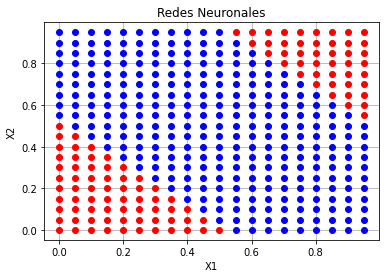

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Neurona:
    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N,1])
        for a in range(N):
            self.w[a,0] = np.random.randn()*0.1        
    
    def sigmoide(self, X):
        return 1/(1 + np.exp(-(np.dot(X, self.w)+self.b)))
    
    def __str__(self):
        return f"b= {self.b}, \nw= \n{self.w}"
        

class Capa:
    def __init__(self, neuronas, entradas):
        self.neuronas = []        
        for a in range(neuronas):
            self.neuronas.append(Neurona(entradas))
    
    def forwardPropagation(self, X):
        salidas = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            salidas[0,a] = self.neuronas[a].sigmoide(X)
        return salidas
    
    def backPropagation(self, error):
        a = 1
        
    def __str__(self):
        cadena = ""
        i = 1
        for a in self.neuronas:
            cadena += "Neurona " + str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena
    
class RedNeuronal:
    "ejemplo de llamada seria: RedNeuronal([4,2,1]), donde el 4 es el número de variables de entrada, el 2 es el número de neuronas de la primer capa, y 1 es l capa de salida"
    def __init__(self, capas):
        self.capas = []
        for a in range(len(capas)-1):
            self.capas.append(Capa(capas[a+1], capas[a]))
    
    def forwardPropagation(self, X):
        for a in range(len(self.capas)):
            X = self.capas[a].forwardPropagation(X)
            #print(f"x= {X}")
        return X
    
    def prediccion(self, X):
        m = X.shape[0]
        print(f"m = {m}")
        Y = np.zeros([m,1])
        for a in range(m):
            Y[a] = self.forwardPropagation(X[a,:])
        return Y
    
    def getCosto(self, X, Y):
        costo = 0
        m = len(Y)
        for a in range(m):
            yp = self.forwardPropagation(X[a,:])
            loss = -(Y[a] * np.log(yp) + (1-Y[a]) * np.log(1-yp))
            costo += loss
        costo /= m
        return costo
    
    def backPropagation(self, X, Y):
        error = self.getCosto(X,Y)
    
    def __str__(self):
        cadena = "Red Neuronal que tiene " + str(len(self.capas[0].neuronas[0].w)) + " entradas y " + str(len(self.capas)) +" capas\n"
        i = 1
        for a in self.capas:
            cadena += "Capa "+ str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena
        
        
datos=pd.read_csv('data/and.csv', sep=',')#,header=None)
# and
# or
# nor
# xnor
print("\nVista corta de los datos")
print(datos.head())
datos = datos.to_numpy()
print(f"Datos= \n{datos}")
N = datos.shape[1] - 1
X = datos[:,0:N]
Y = datos[:,N]
A = RedNeuronal([2,2,1])

####################################################################
#NOR
neurona = A.capas[0].neuronas[0]
#print(str(A))
neurona.b = 10
neurona.w[0,0] = -20
neurona.w[1,0] = -20

#AND
neurona = A.capas[0].neuronas[1]
#print(str(A))
neurona.b = -30
neurona.w[0,0] = 20
neurona.w[1,0] = 20

#OR
neurona = A.capas[1].neuronas[0]
#print(str(A))
neurona.b = -10
neurona.w[0,0] = 20
neurona.w[1,0] = 20
####################################################################

#print(f"\nNeurona programada: \n{neurona}")
entrada = X[3,:]
B = A.forwardPropagation(entrada)
#B = A.getCosto(X,Y)
print(f"entrada= {entrada}")
print(f"salida= {B}")

datos=pd.read_csv('data/datosPrueba.csv', sep=',')#,header=None)
#datosPrueba
datos = datos.to_numpy()
N = datos.shape[1] - 1
m = datos.shape[0]
X = datos[:,0:N]
Yp = A.prediccion(X)
#print(f"prediccion= {Y}")

X0 = [j for j in range(m) if Yp[j]<0.5]
X1 = [j for j in range(m) if Yp[j]>=0.5]


plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Redes Neuronales")
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Neurona:
    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N, 1])
        for a in range(N):
            self.w[a, 0] = np.random.randn() * 0.1

    def sigmoide(self, X):
        return 1 / (1 + np.exp(-(np.dot(X, self.w) + self.b)))

    def __str__(self):
        return f"b= {self.b}, \nw= \n{self.w}"


class Capa:
    def __init__(self, neuronas, entradas):
        self.neuronas = []
        for a in range(neuronas):
            self.neuronas.append(Neurona(entradas))

    def forwardPropagation(self, X):
        salidas = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            salidas[0, a] = self.neuronas[a].sigmoide(X)
        return salidas

    def backPropagation(self, error):
        a = 1


class RedNeuronal:
    def __init__(self, capas):
        self.capas = []
        for a in range(len(capas) - 1):
            self.capas.append(Capa(capas[a + 1], capas[a]))

    def forwardPropagation(self, X):
        for a in range(len(self.capas)):
            X = self.capas[a].forwardPropagation(X)
        return X

    def prediccion(self, X):
        m = X.shape[0]
        Y = np.zeros([m, 1])
        for a in range(m):
            Y[a] = self.forwardPropagation(X[a, :])
        return Y

    def getCosto(self, X, Y):
        costo = 0
        m = len(Y)
        for a in range(m):
            yp = self.forwardPropagation(X[a, :])
            loss = -(Y[a] * np.log(yp) + (1 - Y[a]) * np.log(1 - yp))
            costo += loss
        costo /= m
        return costo

    def backPropagation(self, X, Y):
        error = self.getCosto(X, Y)

    def __str__(self):
        cadena = "Red Neuronal que tiene " + str(
            len(self.capas[0].neuronas[0].w)) + " entradas y " + str(len(self.capas)) + " capas\n"
        i = 1
        for a in self.capas:
            cadena += "Capa " + str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena


def leer_archivo_configuracion(archivo):
    with open(archivo, 'r') as file:
        # Lee la primera línea para obtener la configuración de capas
        capas = list(map(int, file.readline().split()))

        # Crea la red neuronal con la configuración leída
        red_neuronal = RedNeuronal(capas)

        # Lee las siguientes líneas para obtener los parámetros de cada neurona
        for capa in red_neuronal.capas:
            for neurona in capa.neuronas:
                parametros = list(map(int, file.readline().split()))
                neurona.b = parametros[0]
                neurona.w[0, 0] = parametros[1]
                neurona.w[1, 0] = parametros[2]

    return red_neuronal


# Ejemplo de uso
archivo_configuracion = 'data/pesos.txt'
red_desde_archivo = leer_archivo_configuracion(archivo_configuracion)
# Resto de tu código
datos = pd.read_csv('data/and.csv', sep=',')
datos = datos.to_numpy()
N = datos.shape[1] - 1
m = datos.shape[0]
X = datos[:, 0:N]
Yp = red_desde_archivo.prediccion(X)
print(Yp)
X0 = [j for j in range(m) if Yp[j] < 0.5]
X1 = [j for j in range(m) if Yp[j] >= 0.5]
np.savetxt('data/salidas.txt', Yp, delimiter=',')

plt.plot(X[X0, 0], X[X0, 1], "bo")
plt.plot(X[X1, 0], X[X1, 1], "ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Redes Neuronales")
plt.show()

ValueError: could not broadcast input array from shape (0,) into shape (1,)

C:\Users\pinky\AppData\Local\Temp\ipykernel_17672\1232846350.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0, a] = self.neuronas[a].sigmoide(X)


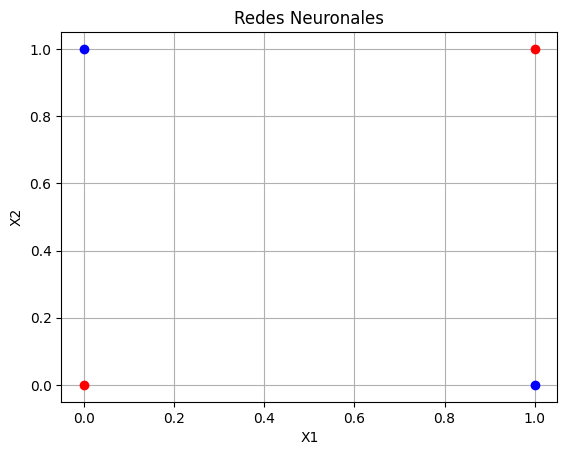

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Neurona:
    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N, 1])
        for a in range(N):
            self.w[a, 0] = np.random.randn() * 0.1

    def sigmoide(self, X):
        return 1 / (1 + np.exp(-(np.dot(X, self.w) + self.b)))

    def __str__(self):
        return f"b= {self.b}, \nw= \n{self.w}"


class Capa:
    def __init__(self, neuronas, entradas):
        self.neuronas = []
        for a in range(neuronas):
            self.neuronas.append(Neurona(entradas))

    def forwardPropagation(self, X):
        salidas = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            salidas[0, a] = self.neuronas[a].sigmoide(X)
        return salidas

    def backPropagation(self, error):
        a = 1


class RedNeuronal:
    def __init__(self, capas):
        self.capas = []
        for a in range(len(capas) - 1):
            self.capas.append(Capa(capas[a + 1], capas[a]))

    def forwardPropagation(self, X):
        for a in range(len(self.capas)):
            X = self.capas[a].forwardPropagation(X)
        return X

    def prediccion(self, X):
        m = X.shape[0]
        Y = np.zeros([m, 1])
        for a in range(m):
            Y[a] = self.forwardPropagation(X[a, :])
        return Y

    def getCosto(self, X, Y):
        costo = 0
        m = len(Y)
        for a in range(m):
            yp = self.forwardPropagation(X[a, :])
            loss = -(Y[a] * np.log(yp) + (1 - Y[a]) * np.log(1 - yp))
            costo += loss
        costo /= m
        return costo

    def backPropagation(self, X, Y):
        error = self.getCosto(X, Y)

    def __str__(self):
        cadena = "Red Neuronal que tiene " + str(
            len(self.capas[0].neuronas[0].w)) + " entradas y " + str(len(self.capas)) + " capas\n"
        i = 1
        for a in self.capas:
            cadena += "Capa " + str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena


def leer_archivo_configuracion(archivo):
    with open(archivo, 'r') as file:
        # Lee la primera línea para obtener la configuración de capas
        capas = list(map(int, file.readline().split()))

        # Crea la red neuronal con la configuración leída
        red_neuronal = RedNeuronal(capas)

        # Lee las siguientes líneas para obtener los parámetros de cada neurona
        for capa in red_neuronal.capas:
            for neurona in capa.neuronas:
                parametros = list(map(int, file.readline().split()))
                neurona.b = parametros[0]
                neurona.w[0, 0] = parametros[1]
                neurona.w[1, 0] = parametros[2]

    return red_neuronal


# Ejemplo de uso
archivo_configuracion = 'data/pesos.txt'
red_desde_archivo = leer_archivo_configuracion(archivo_configuracion)
# Resto de tu código
datos = pd.read_csv('data/and.csv', sep=',')
datos = datos.to_numpy()
N = datos.shape[1] - 1
m = datos.shape[0]
X = datos[:, 0:N]
Yp = red_desde_archivo.prediccion(X)


# Resto de tu código para visualización y demás
X0 = [j for j in range(m) if Yp[j] < 0.5]
X1 = [j for j in range(m) if Yp[j] >= 0.5]

plt.plot(X[X0, 0], X[X0, 1], "bo")
plt.plot(X[X1, 0], X[X1, 1], "ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Redes Neuronales")
plt.show()